In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.100d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.50d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt


In [4]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [5]:
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")

In [6]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [8]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


Text(0, 0.5, 'samples')

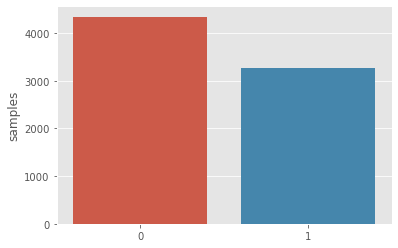

In [11]:
plt.style.use('ggplot')
import seaborn
x = train_df.target.value_counts()

seaborn.barplot(x.index,x)
plt.gca().set_ylabel('samples')

Class 0 (  No disaster) is more than Class 1 (Disaster)

**Character count of Tweets**

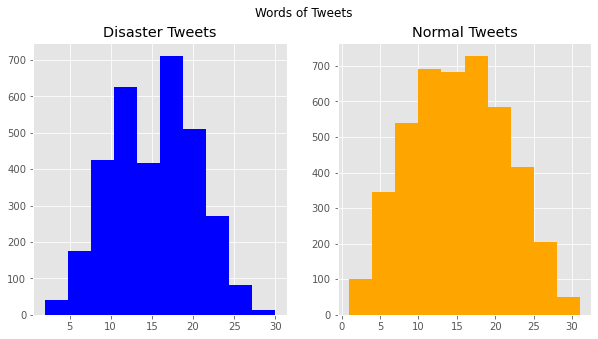

In [12]:
fig,(ax1,ax2) =plt.subplots(1,2,figsize =(10,5))
tweet_len = train_df[train_df['target'] ==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='blue')
ax1.set_title('Disaster Tweets')
tweet_len =train_df[train_df['target'] ==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='orange')
ax2.set_title('Normal Tweets')
fig.suptitle('Words of Tweets')
plt.show()

**Average word length in each tweet**

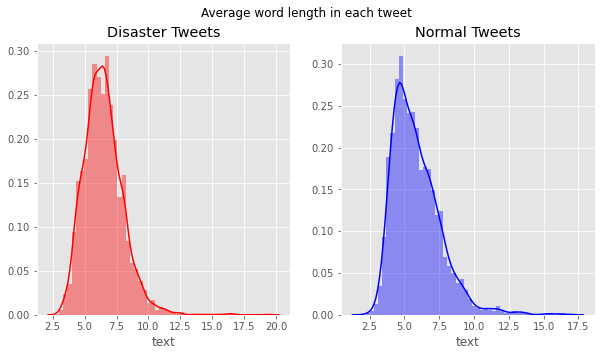

In [13]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
word = train_df[train_df['target'] ==1]['text'].str.split().apply(lambda x: [len(i) for i in x])
seaborn.distplot(word.map(lambda x : np.mean(x)),ax = ax1,color='red')
ax1.set_title('Disaster Tweets')
word = train_df[train_df['target']==0]['text'].str.split().apply(lambda x:[len(i) for i in x])
seaborn.distplot(word.map(lambda x : np.mean(x)),ax = ax2,color ='blue')
ax2.set_title('Normal Tweets')
fig.suptitle('Average word length in each tweet')
plt.show()

In [14]:
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter

In [15]:
def create_corpus(target):
    corpus =[]
    
    for x in train_df[train_df['target'] == target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus
    

**Common stopwords in tweets** 
First analysing the tweets with class 0

In [16]:
stop=set(stopwords.words('english'))

In [17]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 


       

<BarContainer object of 10 artists>

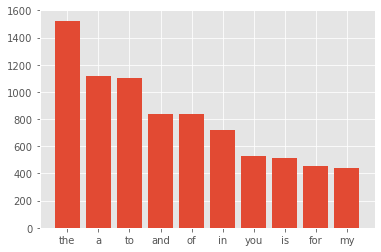

In [18]:
x,y= zip(*top)
plt.bar(x,y)

**Analysing the tweets with class 1**

In [19]:
corpus = create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 


<BarContainer object of 10 artists>

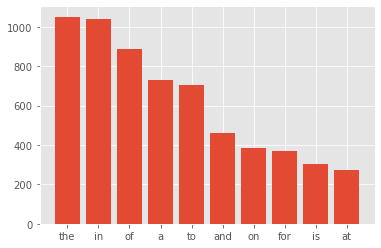

In [20]:
x,y = zip(*top)
plt.bar(x,y)

**"the" dominates which is followed by "a" in class 0 and "in" in class 1.**

**Analysing Punctuations**

Checking punctuations in real disaster tweets

<BarContainer object of 18 artists>

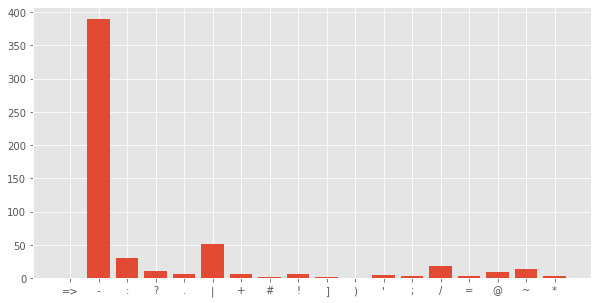

In [21]:
plt.figure(figsize=(10,5))
corpus = create_corpus(1)

dic = defaultdict(int)
import string
punct = string.punctuation

for i in corpus:
    if i in punct:
        dic[i]+=1

x,y =zip(*dic.items())
plt.bar(x,y)


Checking punctuations in Not disaster tweets

<BarContainer object of 20 artists>

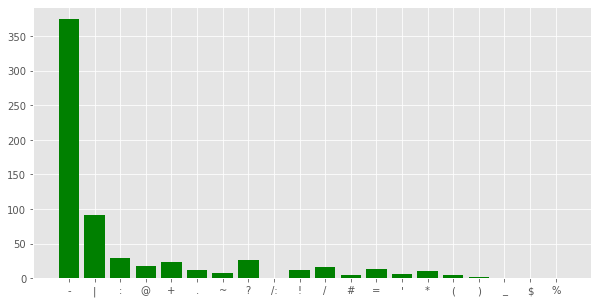

In [22]:
plt.figure(figsize=(10,5))
corpus = create_corpus(0)

dic = defaultdict(int)
import string
punct = string.punctuation

for i in corpus:
    if i in punct:
        dic[i]+=1

x,y =zip(*dic.items())
plt.bar(x,y,color ='green')


**Finding the common words used**

In [23]:
counter = Counter(corpus)
most = counter.most_common()

x=[]
y=[]
for word,count in most[:50]:
    if (word not in stop):
        x.append(word)
        y.append(count)

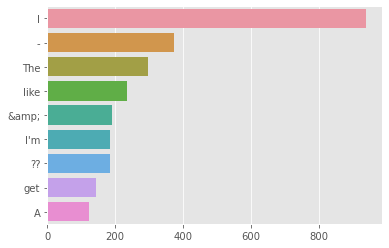

In [24]:
seaborn.barplot(x=y,y=x) #x axis is count and y axis is word
plt.show()

Needed a lot odf data cleaning

**N Gram Analysis**
Going to do a bigram (n =2) over the tweets dataset

In [25]:
def get_top_tweet_bigrams(corpus ,n = None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis =0)
    
    words_freq = [(word,sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x : x[1], reverse = True)
    
    return words_freq[:n]
    

    

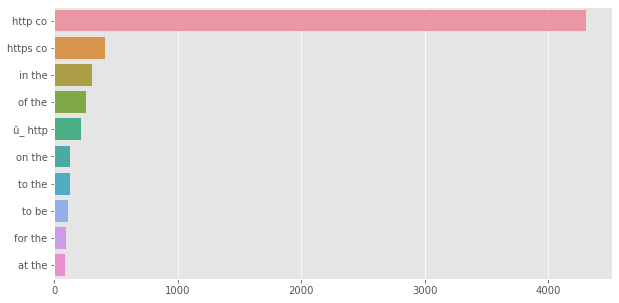

In [26]:
plt.figure(figsize=(10,5))
top_tweet_bigrams = get_top_tweet_bigrams(train_df['text'])[:10]

x,y = map(list,zip(*top_tweet_bigrams))

seaborn.barplot(x=y,y=x)
plt.show()


**Data Cleaning**
Tweets have to be cleaned before modelling. Going to do spelling correction,removing pinctuations,removing html tags and removing emojis

In [27]:
df = pd.concat([train_df,test_df])
df.shape

(10876, 5)

**Removing urls**

In [28]:

import re

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)



In [29]:
df['text'] = df['text'].apply(lambda x : remove_URL(x))

**Removing HTML tags**

In [30]:
def remove_HTML(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)

    

In [31]:
df['text'] = df['text'].apply(lambda x:remove_HTML(x))

**Removing Emojis**

In [32]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'',text)


    
                       
                    

In [33]:
df['text'] = df['text'].apply(lambda x: remove_emojis(x))

**Removing Punctuations**

In [34]:
#Reference
#https://stackoverflow.com/questions/34293875/how-to-remove-punctuation-marks-from-a-string-in-python-3-x-using-translate

In [35]:
import string
def remove_punc(text):
    translator=str.maketrans('','',string.punctuation)
    return text.translate(translator)


    

In [36]:
df['text'] = df['text'].apply(lambda x: remove_punc(x))

**Spelling Correction** Installing pyspellchecker to check spelling

In [37]:
!pip install pyspellchecker

     |████████████████████████████████| 1.9 MB 2.8 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [38]:
from spellchecker import SpellChecker

spell = SpellChecker()

def correct_spelling(text):
    corrected_text=[]
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)



In [39]:
#df['text'] = df['text'].apply(lambda x: correct_spelling(x))

In [40]:
from nltk.tokenize import word_tokenize
import gensim

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm


In [41]:
def create_corpus(df):
    corpus=[]
    for train_df in tqdm(df['text']):
        words = [word.lower() for word in word_tokenize(train_df) if ((word.isalpha() ==1) & (word not in stop))]
        corpus.append(words)
        
    return corpus
                                                                      
    

In [42]:
corpus = create_corpus(df)

100%|██████████| 10876/10876 [00:02<00:00, 3782.31it/s]


In [43]:
embedding_dict={}
with open('../input/glove-global-vectors-for-word-representation/glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [44]:
MAX_LEN = 50
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences = tokenizer_obj.texts_to_sequences(corpus)

tweet_pad = pad_sequences(sequences ,maxlen = MAX_LEN ,truncating = 'post',padding = 'post')


In [45]:
word_index = tokenizer_obj.word_index
print('Number of unique words :  ' ,len(word_index))

Number of unique words :   20342


In [46]:
num_words = len(word_index) +1
embedding_matrix = np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
        
    emb_vec = embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i] = emb_vec


100%|██████████| 20342/20342 [00:00<00:00, 272667.96it/s]


In [47]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [48]:
model = Sequential()
embedding = Embedding(num_words,100,embeddings_initializer = Constant(embedding_matrix),input_length = MAX_LEN,
                     trainable = False)
model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64,dropout = 0.2 ,recurrent_dropout = 0.2))
model.add(Dense(1,activation = 'sigmoid'))

optimizer = Adam(learning_rate  =1e-5)

model.compile(loss = 'binary_crossentropy',optimizer = optimizer , metrics = ['accuracy'])
          
          
          
          

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 100)           2034300   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 100)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                42240     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 2,076,605
Trainable params: 42,305
Non-trainable params: 2,034,300
_________________________________________________________________


In [50]:
train = tweet_pad[:train_df.shape[0]]
test = tweet_pad[train_df.shape[0]:]


In [51]:
X_train,X_test,y_train,y_test =train_test_split(train,train_df['target'].values,test_size = 0.2)
print('Shape of train: ' ,X_train.shape)
print('Shape of validation:', X_test.shape)

Shape of train:  (6090, 50)
Shape of validation: (1523, 50)


In [52]:
history = model.fit(X_train, y_train , batch_size = 4 ,epochs=15,validation_data = (X_test, y_test),verbose =2)

Epoch 1/15
1523/1523 - 92s - loss: 0.6828 - accuracy: 0.5760 - val_loss: 0.6446 - val_accuracy: 0.5581
Epoch 2/15
1523/1523 - 84s - loss: 0.5926 - accuracy: 0.7039 - val_loss: 0.5747 - val_accuracy: 0.7682
Epoch 3/15
1523/1523 - 85s - loss: 0.5552 - accuracy: 0.7479 - val_loss: 0.5472 - val_accuracy: 0.7656
Epoch 4/15
1523/1523 - 86s - loss: 0.5371 - accuracy: 0.7514 - val_loss: 0.5280 - val_accuracy: 0.7689
Epoch 5/15
1523/1523 - 94s - loss: 0.5268 - accuracy: 0.7578 - val_loss: 0.5117 - val_accuracy: 0.7800
Epoch 6/15
1523/1523 - 85s - loss: 0.5156 - accuracy: 0.7645 - val_loss: 0.5017 - val_accuracy: 0.7761
Epoch 7/15
1523/1523 - 85s - loss: 0.5049 - accuracy: 0.7693 - val_loss: 0.4930 - val_accuracy: 0.7892
Epoch 8/15
1523/1523 - 88s - loss: 0.5019 - accuracy: 0.7704 - val_loss: 0.4851 - val_accuracy: 0.7984
Epoch 9/15
1523/1523 - 87s - loss: 0.4962 - accuracy: 0.7741 - val_loss: 0.4779 - val_accuracy: 0.7997
Epoch 10/15
1523/1523 - 82s - loss: 0.4896 - accuracy: 0.7823 - val_loss:

In [54]:
sample = pd.read_csv('../input/nlp-getting-started/sample_submission.csv')

sample.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [55]:
y_pred = model.predict(test)
y_pred = np.round(y_pred).astype(int).reshape(3263)

sub = pd.DataFrame({'id': sample['id'].values.tolist(),'target' : y_pred})

sub.to_csv('submission.csv',index = False)



In [ ]:
sub.head()